In [1]:
import os
print(os.getcwd())


/workspaces/taller/session-01/notebooks


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv('../../datos/Base_Taller.csv',sep= ';')
df.head()

,Zona,Sede,Línea de negocio,Periodo,Ingresos,Costo operativo,Costo de personal,Utilidad Bruta,Margen Bruto,Gastos operativos,Gastos de personal,Utilidad Operacional,Margen Operacional,Personal administrativo,Personal operativo,Ordenes,Horas Ejecutadas,Capacidad en Horas
0,Zona Bogotá,Bogotá Calle 13,Servicio,ene-21,299.325.646,104.646.270,113.157.183,81.522.194,"27,20%",109.535.846,54.461.889,-82.475.542,"-27,60%",14,32,521,"1676,44",4730
1,Zona Bogotá,Bogotá Calle 13,Servicio,feb-21,462.791.315,202.931.576,122.156.616,137.703.123,"29,80%",133.847.321,70.104.228,-66.248.425,"-14,30%",15,32,808,"2271,48",4730
2,Zona Bogotá,Bogotá Calle 13,Servicio,mar-21,695.122.706,197.129.974,132.586.438,365.406.294,"52,60%",145.532.851,67.786.612,152.086.830,"21,90%",14,31,973,"2919,44",4250
3,Zona Bogotá,Bogotá Calle 13,Servicio,abr-21,247.412.027,84.143.832,129.165.712,34.102.484,"13,80%",118.218.962,-28.819.424,-55.297.054,"-22,40%",15,30,606,"2104,14",4410
4,Zona Bogotá,Bogotá Calle 13,Servicio,may-21,407.855.098,126.792.611,119.287.355,161.775.133,"39,70%",110.659.325,68.472.752,-17.356.945,"-4,30%",16,30,635,"2100,92",4410


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Zona                     666 non-null    object
 1   Sede                     666 non-null    object
 2   Línea de negocio         666 non-null    object
 3   Periodo                  666 non-null    object
 4   Ingresos                 666 non-null    object
 5   Costo operativo          666 non-null    object
 6   Costo de personal        666 non-null    object
 7   Utilidad Bruta           666 non-null    object
 8   Margen Bruto             666 non-null    object
 9   Gastos operativos        666 non-null    object
 10  Gastos de personal       666 non-null    object
 11  Utilidad Operacional     666 non-null    object
 12  Margen Operacional       666 non-null    object
 13  Personal administrativo  666 non-null    int64 
 14  Personal operativo       666 non-null    i

In [5]:
df.describe(include='all')

,Zona,Sede,Línea de negocio,Periodo,Ingresos,Costo operativo,Costo de personal,Utilidad Bruta,Margen Bruto,Gastos operativos,Gastos de personal,Utilidad Operacional,Margen Operacional,Personal administrativo,Personal operativo,Ordenes,Horas Ejecutadas,Capacidad en Horas
count,666,666,666,666,666,666,666,666,666,666,666,666,666,666.000000,666.000000,666.000000,666,666.000000
unique,1,15,2,48,666,650,661,666,383,666,645,666,502,NaN,NaN,NaN,612,NaN
top,Zona Bogotá,Bogotá Maquinaria,Servicio,mar-22,1.272.875.999,0,0,791.235.822,"52,40%",132.577.708,0,587.818.650,"1,00%",NaN,NaN,NaN,0,NaN
freq,666,49,619,16,1,12,6,1,6,1,22,1,5,NaN,NaN,NaN,52,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.378378,15.268769,397.974474,NaN,2291.711712
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.165146,12.393965,335.915740,NaN,1931.755541
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,5.000000,121.000000,NaN,710.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,11.000000,352.000000,NaN,1600.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.750000,26.750000,636.000000,NaN,4070.000000


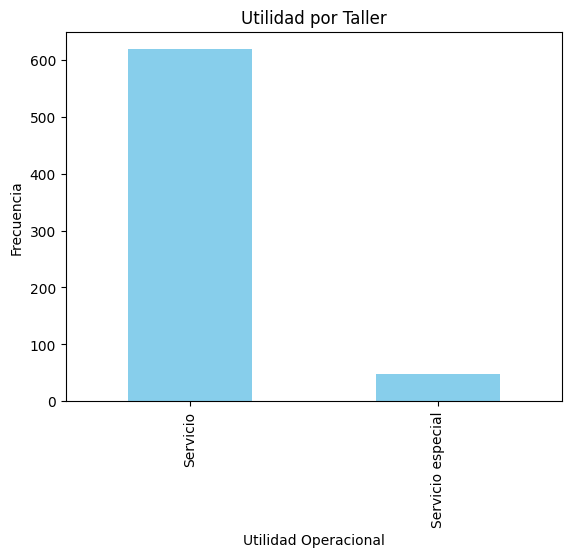

In [6]:
df['Línea de negocio'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Utilidad por Taller')
plt.xlabel('Utilidad Operacional')
plt.ylabel('Frecuencia')
plt.show()

*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

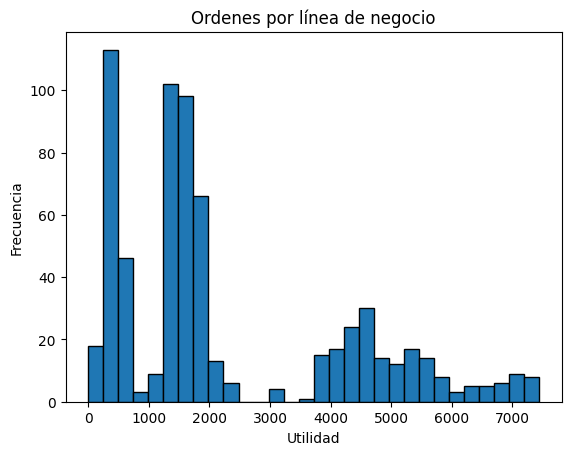

In [7]:
df[' Capacidad en Horas '].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Ordenes por línea de negocio')
plt.xlabel('Utilidad')
plt.ylabel('Frecuencia')
plt.show()

*Interpretación: El histograma muestra la frecuencia de edades. Podemos ver la forma de la distribución y posibles sesgos.*

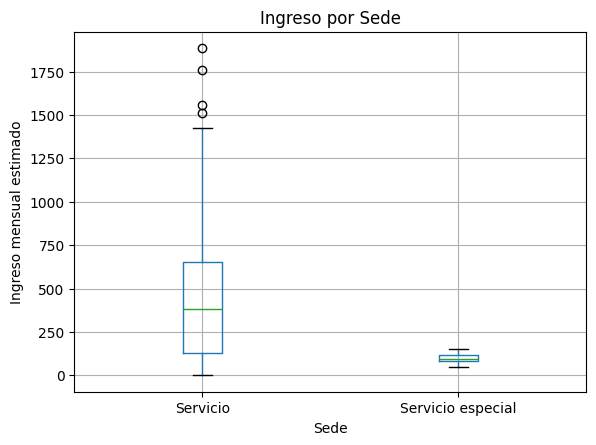

In [8]:
df.boxplot(column=' Ordenes ', by='Línea de negocio')
plt.title('Ingreso por Sede')
plt.suptitle('')
plt.xlabel('Sede')
plt.ylabel('Ingreso mensual estimado')
plt.show()

*Interpretación: El boxplot permite comparar la distribución del ingreso entre grupos de género, y detectar posibles outliers.*